## 5. Categorizing and Tagging Words

### 1. Using a Tagger

#### A part-of-speech tagger, or POS-tagger, processes a sequence of words, and attaches a part of speech tag to each word (don't forget to import nltk):

In [1]:
import nltk

In [2]:
text = nltk.word_tokenize("And now for something completely different")

In [3]:
nltk.pos_tag(text)

[('And', 'CC'),
 ('now', 'RB'),
 ('for', 'IN'),
 ('something', 'NN'),
 ('completely', 'RB'),
 ('different', 'JJ')]

#### Here we see that and is CC, a coordinating conjunction; now and completely are RB, or adverbs; for is IN, a preposition; something is NN, a noun; and different is JJ, an adjective.

#### Let's look at another example, this time including some homonyms:

In [4]:
text = nltk.word_tokenize("They refuse to permit us to obtain the refuse permit")

In [5]:
nltk.pos_tag(text)

[('They', 'PRP'),
 ('refuse', 'VBP'),
 ('to', 'TO'),
 ('permit', 'VB'),
 ('us', 'PRP'),
 ('to', 'TO'),
 ('obtain', 'VB'),
 ('the', 'DT'),
 ('refuse', 'NN'),
 ('permit', 'NN')]

#### Notice that refuse and permit both appear as a present tense verb (VBP) and a noun (NN). E.g. refuse is a verb meaning "deny," while refuse is a noun meaning "trash" (i.e. they are not homophones). Thus, we need to know which word is being used in order to pronounce the text correctly. (For this reason, text-to-speech systems usually perform POS-tagging.)

#### Many of these categories arise from superficial analysis the distribution of words in text. Consider the following analysis involving woman (a noun), bought (a verb), over (a preposition), and the (a determiner). 

#### The text.similar() method takes a word w, finds all contexts w1w w2, then finds all words w' that appear in the same context, i.e. w1w'w2.

In [6]:
text = nltk.Text(word.lower() for word in nltk.corpus.brown.words())

In [7]:
text.similar('woman')

man time day year car moment world house family child country boy
state job place way war girl work word


In [8]:
text.similar('bought')

made said done put had seen found given left heard was been brought
set got that took in told felt


In [9]:
text.similar('over')

in on to of and for with from at by that into as up out down through
is all about


In [10]:
text.similar('the')

a his this their its her an that our any all one these my in your no
some other and


#### Observe that searching for woman finds nouns; searching for bought mostly finds verbs; searching for over generally finds prepositions; searching for the finds several determiners.

### 2 Tagged Corpora

### 2.1 Representing Tagged Tokens

#### By convention in NLTK, a tagged token is represented using a tuple consisting of the token and the tag. We can create one of these special tuples from the standard string representation of a tagged token, using the function str2tuple():

In [11]:
tagged_token = nltk.tag.str2tuple('fly/NN')

In [12]:
tagged_token

('fly', 'NN')

In [13]:
tagged_token[0]

'fly'

In [14]:
tagged_token[1]

'NN'

#### We can construct a list of tagged tokens directly from a string. The first step is to tokenize the string to access the individual word/tag strings, and then to convert each of these into a tuple (using str2tuple()).

In [15]:
sent = '''
... The/AT grand/JJ jury/NN commented/VBD on/IN a/AT number/NN of/IN
... other/AP topics/NNS ,/, AMONG/IN them/PPO the/AT Atlanta/NP and/CC
... Fulton/NP-tl County/NN-tl purchasing/VBG departments/NNS which/WDT it/PPS
... said/VBD ``/`` ARE/BER well/QL operated/VBN and/CC follow/VB generally/RB
... accepted/VBN practices/NNS which/WDT inure/VB to/IN the/AT best/JJT
... interest/NN of/IN both/ABX governments/NNS ''/'' ./.'''

In [16]:
[nltk.tag.str2tuple(t) for t in sent.split()]

[('The', 'AT'),
 ('grand', 'JJ'),
 ('jury', 'NN'),
 ('commented', 'VBD'),
 ('on', 'IN'),
 ('a', 'AT'),
 ('number', 'NN'),
 ('of', 'IN'),
 ('other', 'AP'),
 ('topics', 'NNS'),
 (',', ','),
 ('AMONG', 'IN'),
 ('them', 'PPO'),
 ('the', 'AT'),
 ('Atlanta', 'NP'),
 ('and', 'CC'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('purchasing', 'VBG'),
 ('departments', 'NNS'),
 ('which', 'WDT'),
 ('it', 'PPS'),
 ('said', 'VBD'),
 ('``', '``'),
 ('ARE', 'BER'),
 ('well', 'QL'),
 ('operated', 'VBN'),
 ('and', 'CC'),
 ('follow', 'VB'),
 ('generally', 'RB'),
 ('accepted', 'VBN'),
 ('practices', 'NNS'),
 ('which', 'WDT'),
 ('inure', 'VB'),
 ('to', 'IN'),
 ('the', 'AT'),
 ('best', 'JJT'),
 ('interest', 'NN'),
 ('of', 'IN'),
 ('both', 'ABX'),
 ('governments', 'NNS'),
 ("''", "''"),
 ('.', '.')]

### 2.2   Reading Tagged Corpora (See Slides)

#### Whenever a corpus contains tagged text, the NLTK corpus interface will have a tagged_words() method.

In [17]:
nltk.corpus.brown.tagged_words()

[('The', 'AT'), ('Fulton', 'NP-TL'), ...]

In [18]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

####  Here are some more examples, again using the output format illustrated for the Brown Corpus:

In [ ]:
print(nltk.corpus.nps_chat.tagged_words())

In [ ]:
nltk.corpus.conll2000.tagged_words()

In [ ]:
nltk.corpus.treebank.tagged_words()

#### Not all corpora employ the same set of tags.Initially we want to avoid the complications of these tagsets, so we use a built-in mapping to the "Universal Tagset":

In [19]:
nltk.corpus.brown.tagged_words(tagset='universal')

[('The', 'DET'), ('Fulton', 'NOUN'), ...]

In [20]:
nltk.corpus.nps_chat.tagged_words(tagset='universal')

[('now', 'ADV'), ('im', 'PRON'), ('left', 'VERB'), ...]

In [21]:
nltk.corpus.conll2000.tagged_words(tagset='universal')

[('Confidence', 'NOUN'), ('in', 'ADP'), ('the', 'DET'), ...]

In [22]:
nltk.corpus.treebank.tagged_words(tagset='universal')

[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ...]

### 2.3   A Universal Part-of-Speech Tagset (See Slides)

#### Let's see which of these tags are the most common in the news category of the Brown corpus:

In [23]:
import nltk

In [24]:
from nltk.corpus import brown

In [25]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')

In [26]:
list(brown_news_tagged[0:10])

[('The', 'DET'),
 ('Fulton', 'NOUN'),
 ('County', 'NOUN'),
 ('Grand', 'ADJ'),
 ('Jury', 'NOUN'),
 ('said', 'VERB'),
 ('Friday', 'NOUN'),
 ('an', 'DET'),
 ('investigation', 'NOUN'),
 ('of', 'ADP')]

In [27]:
tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)

In [28]:
tag_fd.most_common()

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

In [ ]:
# EXERCISE 1 Plot the above frequency distribution using tag_fd.plot(cumulative=True). What percentage of words are tagged using the first five tags of the above list?

In [29]:
from matplotlib import pyplot as plt

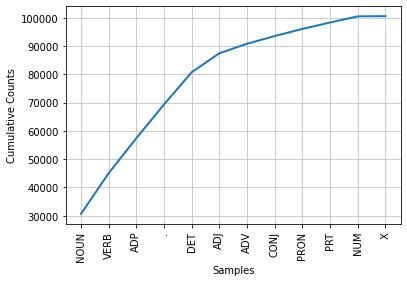

In [30]:
tag_fd.plot(cumulative = True)

In [ ]:
# It seems liek 80% of the words are tagged with first five tags

In [ ]:
# Exercise 2. Which of these universal tags are the most common in the nps_chat corpus and draw a cumulative frequency distribution plot.

In [31]:
from nltk.corpus import nps_chat

In [32]:
nps_tagged = nps_chat.tagged_words(tagset = "universal")

In [33]:
tag_fd = nltk.FreqDist(tag for (word, tag) in nps_tagged)

In [34]:
tag_fd.most_common()

[('NOUN', 9645),
 ('VERB', 8995),
 ('X', 6574),
 ('PRON', 4697),
 ('.', 4259),
 ('ADV', 2325),
 ('DET', 2276),
 ('ADP', 2088),
 ('ADJ', 1846),
 ('PRT', 1014),
 ('CONJ', 726),
 ('NUM', 565)]

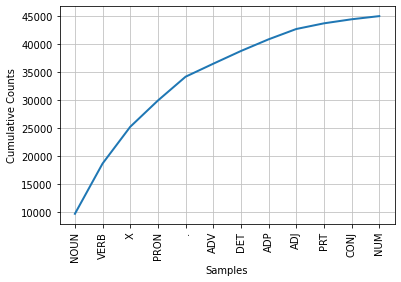

In [36]:
tag_fd.plot(cumulative = True)

In [ ]:
# informal language are part of chat corpus and that's leading to spike in unusual info for others category

### 2.4   Nouns (See Slides)

#### Let's inspect some tagged text to see what parts of speech occur before a noun, with the most frequent ones first. To begin with, we construct a list of bigrams whose members are themselves word-tag pairs such as (('The', 'DET'), ('Fulton', 'NP')) and (('Fulton', 'NP'), ('County', 'N')). Then we construct a FreqDist from the tag parts of the bigrams.

In [37]:
word_tag_pairs = nltk.bigrams(brown_news_tagged)

In [38]:
word_tag_pairs=list(word_tag_pairs)

In [39]:
print(word_tag_pairs[0:10])

[(('The', 'DET'), ('Fulton', 'NOUN')), (('Fulton', 'NOUN'), ('County', 'NOUN')), (('County', 'NOUN'), ('Grand', 'ADJ')), (('Grand', 'ADJ'), ('Jury', 'NOUN')), (('Jury', 'NOUN'), ('said', 'VERB')), (('said', 'VERB'), ('Friday', 'NOUN')), (('Friday', 'NOUN'), ('an', 'DET')), (('an', 'DET'), ('investigation', 'NOUN')), (('investigation', 'NOUN'), ('of', 'ADP')), (('of', 'ADP'), ("Atlanta's", 'NOUN'))]


In [40]:
noun_preceders = [a[1] for (a, b) in word_tag_pairs if b[1] =='NOUN']

In [41]:
noun_preceders

['DET',
 'NOUN',
 'ADJ',
 'VERB',
 'DET',
 'ADP',
 'ADJ',
 'NOUN',
 'DET',
 'DET',
 'VERB',
 'DET',
 'ADP',
 'NOUN',
 'DET',
 'ADJ',
 'ADJ',
 'DET',
 'DET',
 'CONJ',
 'DET',
 'ADP',
 'DET',
 'DET',
 'DET',
 'NOUN',
 'NOUN',
 'ADP',
 'ADJ',
 'NOUN',
 'NOUN',
 'NOUN',
 'VERB',
 '.',
 'ADJ',
 'ADP',
 'NOUN',
 'NOUN',
 'NOUN',
 'ADJ',
 'ADJ',
 'DET',
 'ADJ',
 'DET',
 'DET',
 'ADP',
 'DET',
 'DET',
 'DET',
 'ADP',
 'NOUN',
 'CONJ',
 'NOUN',
 'ADP',
 'NOUN',
 'DET',
 'DET',
 'ADJ',
 'DET',
 'ADJ',
 'DET',
 'CONJ',
 'NOUN',
 'VERB',
 'VERB',
 'ADJ',
 'DET',
 '.',
 'DET',
 'NUM',
 'ADJ',
 'DET',
 'ADP',
 'DET',
 'VERB',
 'DET',
 'ADJ',
 'DET',
 'ADP',
 'NOUN',
 'NOUN',
 'DET',
 'VERB',
 'DET',
 '.',
 'ADP',
 'NOUN',
 'NOUN',
 'NOUN',
 'ADJ',
 'ADJ',
 'VERB',
 'ADJ',
 'ADJ',
 'DET',
 'ADJ',
 'DET',
 'DET',
 'NOUN',
 'NOUN',
 'NOUN',
 'ADJ',
 'ADP',
 'NOUN',
 'NOUN',
 'ADJ',
 'ADJ',
 'DET',
 'NOUN',
 'ADJ',
 'NOUN',
 'DET',
 'DET',
 'NOUN',
 'NOUN',
 'DET',
 'DET',
 'NOUN',
 'DET',
 'DET',
 'DET

In [42]:
fdist = nltk.FreqDist(noun_preceders)

In [43]:
[tag for (tag, _) in fdist.most_common()]

['NOUN',
 'DET',
 'ADJ',
 'ADP',
 '.',
 'VERB',
 'CONJ',
 'NUM',
 'ADV',
 'PRT',
 'PRON',
 'X']

In [ ]:
# This confirms our assertion that nouns occur after determiners and adjectives, including numeral adjectives (tagged as NUM).

In [ ]:
# Exercise 3: Explore the nps_chat corpus and find out what parts of speech occur before a verb, with the most frequent ones first

In [73]:
word_tag_pairs_nps = nltk.bigrams(nps_tagged)

In [74]:
verb_preceders = [a[1] for a,b in word_tag_pairs_nps if b[1]=="VERB"]

In [75]:
fdist=nltk.FreqDist(verb_preceders)

In [76]:
[tag for (tag,_) in fdist.most_common()]

['PRON',
 'NOUN',
 'VERB',
 '.',
 'X',
 'ADV',
 'PRT',
 'DET',
 'ADJ',
 'CONJ',
 'ADP',
 'NUM']

In [ ]:
# PRON occurs the hisghest before verb

### 2.5   Verbs (See Slides)

#### What are the most common verbs in news text? Let's sort all the verbs by frequency:

In [44]:
wsj = nltk.corpus.treebank.tagged_words(tagset='universal')

In [45]:
wsj

[('Pierre', 'NOUN'), ('Vinken', 'NOUN'), (',', '.'), ...]

In [46]:
word_tag_fd = nltk.FreqDist(wsj)

In [47]:
word_tag_fd

FreqDist({(',', '.'): 4885, ('the', 'DET'): 4038, ('.', '.'): 3828, ('of', 'ADP'): 2319, ('to', 'PRT'): 2161, ('a', 'DET'): 1874, ('in', 'ADP'): 1554, ('and', 'CONJ'): 1505, ('*-1', 'X'): 1123, ('0', 'X'): 1099, ...})

In [48]:
word_tag_fd.most_common(40)

[((',', '.'), 4885),
 (('the', 'DET'), 4038),
 (('.', '.'), 3828),
 (('of', 'ADP'), 2319),
 (('to', 'PRT'), 2161),
 (('a', 'DET'), 1874),
 (('in', 'ADP'), 1554),
 (('and', 'CONJ'), 1505),
 (('*-1', 'X'), 1123),
 (('0', 'X'), 1099),
 (('*', 'X'), 965),
 (('for', 'ADP'), 815),
 (('*T*-1', 'X'), 806),
 (("'s", 'PRT'), 761),
 (('*U*', 'X'), 744),
 (('$', '.'), 718),
 (('The', 'DET'), 713),
 (('``', '.'), 702),
 (("''", '.'), 684),
 (('is', 'VERB'), 671),
 (('said', 'VERB'), 628),
 (('that', 'ADP'), 513),
 (('on', 'ADP'), 483),
 (('it', 'PRON'), 476),
 (('%', 'NOUN'), 445),
 (('by', 'ADP'), 427),
 (('at', 'ADP'), 402),
 (('with', 'ADP'), 387),
 (('from', 'ADP'), 386),
 (('million', 'NUM'), 383),
 (('Mr.', 'NOUN'), 375),
 (('*-2', 'X'), 372),
 (('was', 'VERB'), 367),
 (('are', 'VERB'), 367),
 (('be', 'VERB'), 356),
 (('*T*-2', 'X'), 345),
 (('has', 'VERB'), 339),
 (('as', 'ADP'), 333),
 (('its', 'PRON'), 332),
 (("n't", 'ADV'), 325)]

In [49]:
[wt[0] for (wt, _) in word_tag_fd.most_common() if wt[1] == 'VERB']

['is',
 'said',
 'was',
 'are',
 'be',
 'has',
 'have',
 'will',
 'says',
 'would',
 'were',
 'had',
 'been',
 'could',
 "'s",
 'can',
 'do',
 'say',
 'make',
 'may',
 'did',
 'rose',
 'made',
 'does',
 'expected',
 'buy',
 'take',
 'get',
 'might',
 'sell',
 'added',
 'sold',
 'help',
 'including',
 'should',
 'reported',
 'according',
 'pay',
 'compared',
 'being',
 'fell',
 'began',
 'based',
 'used',
 'closed',
 "'re",
 'want',
 'see',
 'took',
 'yield',
 'offered',
 'set',
 'priced',
 'approved',
 'come',
 'noted',
 'cut',
 'ended',
 'found',
 'increased',
 'become',
 'think',
 'named',
 'go',
 'trying',
 'proposed',
 'received',
 'growing',
 'declined',
 'held',
 'give',
 'came',
 'use',
 'put',
 'making',
 'continue',
 'raise',
 'estimated',
 'called',
 'paid',
 'designed',
 'going',
 'expects',
 'seeking',
 'must',
 'plans',
 'wo',
 'increasing',
 'saying',
 'got',
 'owns',
 'trading',
 'acquired',
 'gained',
 'fined',
 'reached',
 'holding',
 'announced',
 'filed',
 'became',


#### Note that the items being counted in the frequency distribution are word-tag pairs. Since words and tags are paired, we can treat the word as a condition and the tag as an event, and initialize a conditional frequency distribution with a list of condition-event pairs. This lets us see a frequency-ordered list of tags given a word:

In [50]:
cfd1 = nltk.ConditionalFreqDist(wsj)

In [51]:
cfd1['yield'].most_common()

[('VERB', 28), ('NOUN', 20)]

In [52]:
cfd1['cut'].most_common()

[('VERB', 25), ('NOUN', 3)]

#### We can reverse the order of the pairs, so that the tags are the conditions, and the words are the events. Now we can see likely words for a given tag. 

In [53]:
cfd2 = nltk.ConditionalFreqDist((tag, word) for (word, tag) in wsj)

In [54]:
list(cfd2['VERB'])

['will',
 'join',
 'is',
 'publishing',
 'was',
 'named',
 'used',
 'make',
 'has',
 'caused',
 'exposed',
 'reported',
 'enters',
 'causing',
 'show',
 'said',
 'makes',
 'stopped',
 'using',
 'were',
 'appear',
 'bring',
 "'re",
 'talking',
 'heard',
 'having',
 'studied',
 'have',
 'are',
 'led',
 'making',
 'replaced',
 'sold',
 'worked',
 'died',
 'expected',
 'surviving',
 'including',
 'diagnosed',
 'study',
 'appears',
 'be',
 'industrialized',
 'owned',
 'support',
 'argue',
 'should',
 'regulate',
 'found',
 'does',
 'classified',
 'according',
 'rejected',
 'explained',
 'imposed',
 'remaining',
 'outlawed',
 'made',
 'dumped',
 'imported',
 'poured',
 'mixed',
 'described',
 'hung',
 'ventilated',
 "'s",
 'contracted',
 'recognize',
 'took',
 'continued',
 'slide',
 'expect',
 'tracked',
 'eased',
 'ended',
 'assume',
 'continues',
 'lengthened',
 'thought',
 'indicate',
 'declining',
 'permit',
 'retain',
 'considered',
 'rising',
 'can',
 'capture',
 'watch',
 'reached',


### 2.6   Adjectives and Adverbs

#### Two other important word classes are adjectives and adverbs. Adjectives describe nouns, and can be used as modifiers (e.g. large in the large pizza), or in predicates (e.g. the pizza is large). English adjectives can have internal structure (e.g. fall+ing in the falling stocks). Adverbs modify verbs to specify the time, manner, place or direction of the event described by the verb (e.g. quickly in the stocks fell quickly). Adverbs may also modify adjectives (e.g. really in Mary's teacher was really nice). English has several categories of closed class words in addition to prepositions, such as articles (also often called determiners) (e.g., the, a), modals (e.g., should, may), and personal pronouns (e.g., she, they). Each dictionary and grammar classifies these words differently.

### 2.7   Unsimplified Tags

#### Let's find the most frequent nouns of each noun part-of-speech type. The program in 2.2 finds all tags starting with NN, and provides a few example words for each one. You will see that there are many variants of NN; the most important contain $ for possessive nouns, S for plural nouns (since plural nouns typically end in s) and P for proper nouns. In addition, most of the tags have suffix modifiers: -NC for citations, -HL for words in headlines and -TL for titles (a feature of Brown tags).

In [55]:
def findtags(tag_prefix, tagged_text):
    cfd = nltk.ConditionalFreqDist((tag, word) for (word, tag) in tagged_text
                                  if tag.startswith(tag_prefix))
    return dict((tag, cfd[tag].most_common(5)) for tag in cfd.conditions())

In [56]:
tagdict = findtags('NN', nltk.corpus.brown.tagged_words(categories='news'))

In [57]:
for tag in sorted(tagdict):
    print(tag, tagdict[tag])

NN [('year', 137), ('time', 97), ('state', 88), ('week', 85), ('man', 72)]
NN$ [("year's", 13), ("world's", 8), ("state's", 7), ("nation's", 6), ("city's", 6)]
NN$-HL [("Golf's", 1), ("Navy's", 1)]
NN$-TL [("President's", 11), ("Administration's", 3), ("Army's", 3), ("League's", 3), ("University's", 3)]
NN-HL [('sp.', 2), ('problem', 2), ('Question', 2), ('cut', 2), ('party', 2)]
NN-NC [('ova', 1), ('eva', 1), ('aya', 1)]
NN-TL [('President', 88), ('House', 68), ('State', 59), ('University', 42), ('City', 41)]
NN-TL-HL [('Fort', 2), ('Mayor', 1), ('Commissioner', 1), ('City', 1), ('Oak', 1)]
NNS [('years', 101), ('members', 69), ('people', 52), ('sales', 51), ('men', 46)]
NNS$ [("children's", 7), ("women's", 5), ("men's", 3), ("janitors'", 3), ("taxpayers'", 2)]
NNS$-HL [("Dealers'", 1), ("Idols'", 1)]
NNS$-TL [("Women's", 4), ("States'", 3), ("Giants'", 2), ("Princes'", 1), ("Bombers'", 1)]
NNS-HL [('Wards', 1), ('deputies', 1), ('bonds', 1), ('aspects', 1), ('Decisions', 1)]
NNS-TL [

### 2.8   Exploring Tagged Corpora

#### Let's briefly return to the kinds of exploration of corpora we saw in previous chapters, this time exploiting POS tags.

#### Suppose we're studying the word often and want to see how it is used in text. We could ask to see the words that follow often

In [58]:
 brown_learned_text = brown.words(categories='learned')

In [59]:
sorted(set(b for (a, b) in nltk.bigrams(brown_learned_text) if a == 'often'))

[',',
 '.',
 'accomplished',
 'analytically',
 'appear',
 'apt',
 'associated',
 'assuming',
 'became',
 'become',
 'been',
 'began',
 'call',
 'called',
 'carefully',
 'chose',
 'classified',
 'colorful',
 'composed',
 'contain',
 'differed',
 'difficult',
 'encountered',
 'enough',
 'equate',
 'extremely',
 'found',
 'happens',
 'have',
 'ignored',
 'in',
 'involved',
 'more',
 'needed',
 'nightly',
 'observed',
 'of',
 'on',
 'out',
 'quite',
 'represent',
 'responsible',
 'revamped',
 'seclude',
 'set',
 'shortened',
 'sing',
 'sounded',
 'stated',
 'still',
 'sung',
 'supported',
 'than',
 'to',
 'when',
 'work']

#### However, it's probably more instructive to use the tagged_words() method to look at the part-of-speech tag of the following words:

In [60]:
brown_lrnd_tagged = brown.tagged_words(categories='learned', tagset='universal')

In [61]:
tags = [b[1] for (a, b) in nltk.bigrams(brown_lrnd_tagged) if a[0] == 'often']

In [62]:
fd = nltk.FreqDist(tags)

In [63]:
fd.tabulate()

VERB  ADV  ADP  ADJ    .  PRT 
  37    8    7    6    4    2 


#### Notice that the most high-frequency parts of speech following often are verbs. Nouns never appear in this position (in this particular corpus).

#### Next, let's look at some larger context, and find words involving particular sequences of tags and words (in this case "Verb to Verb"). In code-three-word-phrase we consider each three-word window in the sentence, and check if they meet our criterion. If the tags match, we print the corresponding words.

In [64]:
from nltk.corpus import brown
def process(sentence):
    for (w1,t1), (w2,t2), (w3,t3) in nltk.trigrams(sentence): 
        if (t1.startswith('V') and t2 == 'TO' and t3.startswith('V')): 
            print(w1, w2, w3) 

In [65]:
from nltk.corpus import brown
def process(sentence):
    for (w1,t1), (w2,t2), (w3,t3) in nltk.trigrams(sentence): 
        if (t1.startswith('V') and w2 == 'to' and t3.startswith('V')): 
            print(w1, w2, w3) 

In [66]:
for tagged_sent in brown.tagged_sents():
    process(tagged_sent)

combined to achieve
continue to place
serve to protect
wanted to wait
allowed to place
expected to become
expected to approve
expected to make
intends to make
seek to set
like to see
designed to provide
get to hear
expects to tell
expected to give
prefer to pay
required to obtain
permitted to teach
designed to reduce
Asked to elaborate
got to go
raised to pay
scheduled to go
cut to meet
needed to meet
hastened to add
found to prevent
continue to insist
compelled to make
made to remove
revamped to give
want to risk
appear to spark
fails to consider
plans to call
going to examine
plans to name
come to pass
voted to accept
happens to hold
authorized to adopt
hesitated to prosecute
try to make
decided to spend
taken to preserve
left to preserve
stand to bring
decided to seek
trying to induce
proposing to make
decided to run
directed to investigate
expected to pass
expected to make
expected to encounter
hopes to pass
came to pay
expected to receive
understood to follow
wanted to vote
decide

tried to integrate
poised to strike
try to force
attempting to reach
afford to take
forbidden to sit
plans to import
likes to imagine
used to get
trying to make
driven to scrounging
ceased to suggest
going to work
wanting to cut
choose to persuade
trying to keep
like to embark
suited to defeat
hastened to put
like to add
want to preserve
required to participate
happened to save
doing to promote
tempted to quote
continuing to capture
need to communicate
like to see
interested to know
allowed to rust
chose to devote
left to choose
want to own
plan to become
persuaded to restock
seems to improve
arranged to permit
seem to lend
allowed to mix
starts to swing
seems to stop
ordered to hold
fitted to endure
trying to follow
threatening to explode
rides to break
managed to make
dancing to display
hasten to report
seems to come
reassuring to see
profess to know
help to explain
forced to rely
attempt to homogenize
like to put
continue to try
try to come
seem to deal
decide to let
tries to take
t

love to crack
yearn to make
tried to see
love to dust
like to become
decide to write
cause to exist
learn to portray
learn to portray
began to advise
taught to yield
prefer to cope
helps to explain
surprised to bump
seemed to brave
begins to regard
began to embezzle
accustomed to submitting
appears to endorse
expected to like
begin to assert
began to challenge
going to become
helping to make
began to stress
began to describe
fails to gain
liked to play
love to audition
wanted to show
like to see
loved to dance
try to bid
wanted to go
asked to leave
continued to promote
wished to meet
hoping to see
got to know
paused to comfort
hesitate to quote
decided to see
wanted to take
need to know
need to look
beginning to protrude
try to speak
decides to proceed
interested to hear
seems to probe
preferring to consider
known to go
amazed to realize
seeking to help
interpreted to conform
explored to find
trying to throw
designed to find
required to mark
asked to consider
seem to involve
seems to s

compelled to find
wishes to continue
ceasing to write
stops to ask
expected to fulfill
tailored to meet
want to say
want to quote
seems to realize
primed to catch
try to diagnose
want to point
used to regard
seems to represent
committed to establishing
trying to draw
wish to see
used to include
allowed to operate
urged to produce
afford to present
decides to drop
expect to abolish
needed to pit
tempted to blame
hope to serve
tried to remedy
tends to express
seem to believe
permitted to return
attempted to make
prepared to demonstrate
calculated to suggest
seemed to disconcert
known to make
going to talk
learns to focus
chooses to subordinate
wish to preserve
cease to exist
seem to constitute
destined to fail
wants to get
began to understand
wanted to capture
liked to tell
decided to migrate
continued to trouble
labored to finish
decided to return
waiting to go
chosen to serve
came to know
helped to escape
opened to admit
happened to see
brought to bear
inclined to argue
seeming to say


directed to make
directed to establish
continued to display
required to move
planned to furnish
agreed to submit
initiated to resolve
found to exist
taken to isolate
modified to reduce
tending to separate
established to gather
used to study
used to measure
used to calculate
directed to mail
offers to pay
promises to pay
construed to limit
directed to pay
directed to cover
failed to offer
intends to pursue
helping to create
wish to merge
pleased to note
continue to serve
pleased to note
inclined to drag
trying to get
made to enlist
try to run
designed to help
designed to reflect
designed to avoid
designed to reflect
required to help
working to develop
installed to increase
prepared to stay
used to keep
came to receive
tend to create
attempting to bring
designed to arrest
attempt to monopolize
held to appoint
prepared to submit
allowed to petition
ordered to terminate
required to pass
required to pass
permitted to endanger
compelled to testify
permitted to rebut
failed to show
permitted 

mean to say
sought to express
said to learn
mean to say
meant to say
meant to say
meant to express
forced to go
disposed to quarrel
seem to present
allowed to move
tended to reflect
beginning to appreciate
begun to disturb
venture to assign
crystallized to find
begin to show
beginning to expand
dared to give
continued to employ
began to creep
seems to appear
rode to arrest
serve to quiet
decided to ride
prepared to fight
allowed to see
refused to give
compelled to kill
desiring to leave
wanted to clean
needed to hire
continued to spring
extended to include
intending to use
need to commit
sought to place
want to know
want to know
serve to contrast
obligated to regard
tried to make
attempting to falsify
continued to accuse
continued to accuse
dare to instigate
acting to deliver
seeking to free
endeavoring to deliver
doomed to suffer
adopted to accomplish
fails to honor
began to mix
began to paint
set to shuttling
trying to simulate
begun to broaden
seems to contain
tends to assert
seem t

going to leave
returning to seek
bother to look
try to run
going to make
began to wave
gone to get
Want to try
going to call
want to find
want to see
designed to put
turned to see
forced to use
trying to drag
start to angle
tried to flatten
managed to hunch
brought to make
surprised to find
started to back
want to try
dedicated to tracking
trying to catch
used to keep
forget to turn
promised to observe
started to plod
tried to turn
beginning to feel
decided to indulge
forgotten to turn
meant to shut
want to leave
want to go
got to remember
got to put
threaten to call
need to take
going to get
get to know
paused to look
seemed to remember
Happened to hear
got to get
begun to tell
begun to question
began to doubt
wished to frighten
need to break
wished to make
tried to give
got to eat
attempt to frighten
trying to find
want to talk
refusing to bear
Try to find
want to go
like to make
going to go
Remember to tell
wanted to know
tried to think
tried to make
began to nod
began to sink
tried

decided to set
seem to locate
allowed to come
allowed to leave
sent to clean
proceeded to disturb
came to teach
wait to get
get to school
beginning to stir
got to get
seemed to think
trying to get
struggling to get
mean to pull
got to take
trying to think
seeming to scream
sought to make
proceeded to give
advised to flee
like to hurt
hurt to beat
want to go
chanced to glance
vowed to take
started to move
began to sizzle
cared to see
time to pay
determined to hold
beginning to fold
wanted to smoke
seem to get
trying to find
like to keep
seem to snap
like to think
beginning to find
beginning to look
going to last
going to prove
hoped to die
gone to live
stayed to get
turned to go
going to see
going to laugh
tried to bite
seem to rise
come to see
got to know
seem to take
beginning to creep
seemed to rain
like to hear
come to make
started to move
bent to pick
permitted to operate
beginning to get
seemed to think
tried to make
wanted to present
expected to stay
wish to start
got to run
like

In [ ]:
#  Exercise 4: Find words involving particular sequences of tags and words (for example "Noun and Noun") in the brown corpus.

In [78]:
from nltk.corpus import brown

In [80]:
def process(sentence):
    for (w1, t1), (w2, t2), (w3,t3) in nltk.trigrams(sentence):
        if (t1.startswith('NN') and w2 == 'and' and t3.startswith('NN')):
            print(w1,w2,w3)

In [81]:
for tagged_sent in brown.tagged_sents():
    process(tagged_sent)

praise and thanks
registration and election
guardians and administrators
fees and compensation
night and weekend
administration and operation
man and wife
principal and chairman
Revenue and Taxation
insurance and pipeline
gifts and donations
stocks and bonds
teacher and principal
skills and discrimination
causes and prevention
dependency and illegitimacy
time and attention
television and radio
demands and proposals
worker and employer
security and railroad
doctor and hospital
medicine and dentistry
points and setbacks
Cooperation and Development
Delinquency and Crime
support and cooperation
Education and Welfare
Delinquency and Youth
burglary and larceny
sirens and rescue
labor and special-interest
grocery and variety
outlets and department
Liberals and conservatives
machinist and toolmaker
school and transportation
leaders and campaign
forestry and employment
warden and chief
plows and tractor
Cross and State
candidate and party
business and industry
district and county
rank and file


youth and experience
defect and deviation
interest and enthusiasm
control and direction
child and adult
marriage and parenthood
design and color
tomatoes and greens
clubrooms and workers'
support and advice
state and county
directors and representatives
shapes and sizes
Aircraft and prices
listeners and readers
conversation and dinner
Prison and Jail
bars and agreement
boards and inmates
approval and participation
football and race
States and experts
breakfasts and dinners
manuscripts and languages
depth and meaning
perusal and comparison
clarity and beauty
words and phrases
spelling and punctuation
words and phrases
project and chairman
toe and heel
collar and bow
finger and thumb
jacket and crown
dentists and patients
experimentation and changes
Cholesterol and thyroid
reading and instruction
speeches and letters
authority and lecturer
frauds and phonies
refrigerator and gas
universities and colleges
families and children
smell and feel
youth and strength
recession and unemployment
c

love and understanding
differentiation and exclusion
expression and institutions
traditions and ways
traditions and ways
centers and agents
culture and ideology
cultures and religions
state and society
state and society
church and state
absoluteness and finality
absoluteness and finality
risks and danger
order and injustice
stimulation and alarm
pride and worth
aspirations and hopes
brokers and home
church and university
ethicists and theologians
faculty and student
faculty and students
power and influence
skills and specialization
meaning and associations
interests and attitudes
power and respectability
attitudes and intentions
Race and Housing
clauses and practices
choice and judgment
business and university
studies and findings
Race and Housing
Housing and others
church and university
information and settings
values and maintenance
function and limitations
agitation and strife
methods and practices
faculty and students
bearer and critic
science and religion
peace and abundance
wood 

shutdowns and startups
quality and price
dress and terrain
sportsmen and women
firearms and ammunition
hunting and target
resource-use and game
land and water
Arms and Ammunition
needs and interests
interpretation and leadership
colleges and universities
education and recreation
boys and girls
attitudes and appreciations
trap and skeet
rifle and pistol
continuation and expansion
facilities and activities
gun and ammunition
youths and adults
gun and ammunition
boys and girls
firearms and ammunition
seagulls and bluefish
windbreaks and sunshades
challenges and possibilities
families and tents
tents and camp
kitchens and bedding
rods and binoculars
gas and oil
fun and adventure
adventure and family
personnel and paper
dissatisfaction and loss
titles and incomes
attainment and success
dollars and titles
design and long-time
positions and compensation
status and pay
compensation and status
engineers and headquarters
opportunity and satisfaction
company and vice-president
responsibilities an

regret and jubilation
Abolition and Emancipation
background and interest
forties and fifties
music and art
writer and lecturer
dams and wildlife
space and silence
soup and kisses
contracts and charters
sponsor and benefactor
forests and remoteness
Arts and Sciences
horses and wagons
father and uncle
characters and situations
brothers and sisters
comfort and stay
glee-club and choir
church and community
travel and maintenance
manners and conduct
flowers and plants
plants and birds
mind and heart
climbing and horseback
force and eloquence
individuals and agencies
interest and efforts
rhetoric and bookkeeping
trials and hardships
school and job
school and employers
schools and employers
satisfaction and material
identification and motivation
scholarship and science
boys and girls
skill and knowledge
school and college
boys and girls
employment and education
techniques and fermentation
meat and potatoes
swine and dairy
cattle and poultry
sorghum and barley
seeds and seed
grains and forages

discussion and debate
doctors and President
doubts and fears
distinction and fact
order and truth
disorder and negation
action and interests
Relativism and equality
effort and resources
illness and delirium
gloom and foreboding
peoples and times
brother and sister
mother and son
Mother and son
man and nature
heads and feet
colors and forms
liberalism and progress
interpreter and clerk
money and papers
will and love
men and objects
experiences and escape
doorways and windows
commercialism and materialism
form and technique
patronage and force
force and intimidation
intimidation and fear
mind and action
novels and stories
college and university
novels and tales
thoughts and feelings
problems and crises
concern and inquiry
humor and proportion
hearsay and legend
enterprises and associations
plans and projects
currents and rhythms
cycles and adaptations
sun and moon
component and matter
facts and techniques
attraction and conflict
men and women
insight and intuition
elegance and purity
Fat

SBA and banks
employees and dollar
earnings and prospects
Research and Information
firms and individuals
work and charges
principal and interest
reports and evaluation
will and goal
objectives and resources
needs and requirements
review and implementation
budgeting and programing
waste and diversion
machinery and equipment
respect and admiration
wife and children
leader and conciliator
sweep and scope
loyalty and character
dignity and honesty
forthrightness and nobility
Security and Exchange
rights and obligations
maintenance and management
assignment and use
use and management
need and assignment
need and position
driver and use
need and assignment
assignment and use
conditions and restrictions
requirements and procedures
time and payment
expenses and $15
1920s and '30s
vehicles and employees
History and operation
gasoline and automobile
Gasoline and automobile
maintenance and control
Research and Office
maintenance and cost-data
studies and analyses
mile and miles
personnel and dupli

wind and string
students and faculty
meaning and importance
philosophy and history
thought and history
maturity and experience
understanding and appreciation
procedure and controls
tennis and golf
fall and spring
organizations and student
editor and business
editor and business
editor and business
planning and production
government and student
formulation and execution
life and activities
business and economists
retailers and distributors
consoles and combinations
sales and production
sales and production
Research and development
test and evaluation
Aeronautics and Space
storage and retrieval
capacitors and resistors
thyratron and silicon
President and Director
production and assistant
scope and nature
faculty and administration
talent and respect
appointment and promotion
appointment and promotion
colleges and universities
decision and action
colleges and universities
materials and library
plant and equipment
stature and size
hopes and dreams
dollars and cents
faith and credit
instruc

dangers and limitations
structure and phraseology
attitudes and opinions
characteristics and practices
Preparation and pretest
AIA and TR
opinions and practices
weapons and weapon
name and address
opinions and practices
opinions and practices
opinions and practices
methods and results
characteristics and practices
staff and money
time and place
shed and fields
processes and events
interests and capabilities
growth and decline
parents and teachers
parents and teachers
picnics and family
parents and teachers
psychologists and child
Teachers and administrators
learning and adjustment
retardation and maladjustment
retardation and maladjustment
principals and teachers
Desegregation and court
problems and issues
houses and elevator
past and present
districts and schools
children and teachers
goal and method
factors and school
trustees and board
interests and values
boards and school
content and method
attitudes and skills
disadvantages and deprivations
school and college
lower-class and lowe

chairs and sofas
cover and pillows
table and chairs
clothing and junk
sneakers and shorts
myrrh and aloes
mother and son
myrrh and aloes
diagrams and sketches
coverings and veils
legs and feet
flesh and bone
body and face
linen and silk
fields and homes
quality and translucence
clay and wax
preparations and services
pain and anguish
curiosity and foreboding
Road and hill
arms and faces
dancers and guests
trolls and wood
roads and horses'
weirs and rocks
fields and farms
farms and hayfields
fishers and mooncursers
yachts and ketches
stakes and barriers
town and sea
shells and mud
sun and weather
spite and calumny
Injury and ingratitude
pleasure and joy
tractors and machinery
camps and towns
children and responsibilities
flesh and blood
towboats and barges
abbot and beadsman
charm and peace
Brains and beauty
sultans and scimitars
caliphs and harem
wood and urine
slits and back
joy and gratitude
mud and river
beech and horse-chestnut
nose and throat
manners and graces
loneliness and bored

certainty and security
tranquility and composure
face and enchantment
warmth and happiness
disdain and indifference
indignation and anger
rage and despair
violence and retribution
games and races
hurt and envy
heat and outcry
birch and maples
jacket and trousers
love and exasperation
husband and wife
words and ways
aunt's and uncle's
tourists and beach
spirits and banshees
banshees and vampires
vampires and witches
pineapple and cherries
cod and salmon
bones and shrimp
checks and money
help and understanding
clothes and dishes
alibis and excuses
dilatation and curettage
bread and cheese
bread and cheese
dignity and beauty
poise and posture
hair and ears
women and unhappiness
aqueducts and tombs
pills and tonics
anxiety and dismay
brother and sister
gentility and principle
hands and feet
mother and father
beer and poker
poker and male
mist and fog
juice and honey
shouting and screaming
politics and history
flesh and skin
dignity and beauty
color and beauty
math and science
time and poli

#### Finally, let's look for words that are highly ambiguous as to their part of speech tag. Understanding why such words are tagged as they are in each context can help us clarify the distinctions between the tags. (See Slides)

In [67]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')

In [68]:
data = nltk.ConditionalFreqDist((word.lower(), tag)
                           for (word, tag) in brown_news_tagged)

In [69]:
for word in sorted(data.conditions()):
    if len(data[word]) > 3:
        tags = [tag for (tag, _) in data[word].most_common()]
        print(word, ' '.join(tags))

best ADJ ADV VERB NOUN
close ADV ADJ VERB NOUN
open ADJ VERB NOUN ADV
present ADJ ADV NOUN VERB
that ADP DET PRON ADV


In [70]:
for word in sorted(data.conditions()):
    if len(data[word]) > 3:
        print(data[word].most_common()) 

[('ADJ', 28), ('ADV', 1), ('VERB', 1), ('NOUN', 1)]
[('ADV', 6), ('ADJ', 3), ('VERB', 2), ('NOUN', 1)]
[('ADJ', 13), ('VERB', 11), ('NOUN', 8), ('ADV', 1)]
[('ADJ', 21), ('ADV', 7), ('NOUN', 1), ('VERB', 1)]
[('ADP', 546), ('DET', 150), ('PRON', 128), ('ADV', 5)]


## 3 Mapping Words to Properties Using Python Dictionaries

### 3.1 Indexing Lists vs Dictionaries (See Slides)

### 3.2   Dictionaries in Python

#### Python provides a dictionary data type that can be used for mapping between arbitrary types. 

#### To illustrate, we define pos to be an empty dictionary and then add four entries to it, specifying the part-of-speech of some words. We add entries to a dictionary using the familiar square bracket notation:

In [82]:
pos = {}

In [83]:
pos

{}

In [84]:
pos['colorless'] = 'ADJ' #1

In [85]:
pos['ideas'] = 'N'

In [86]:
pos['sleep'] = 'V'

In [87]:
pos['furiously'] = 'ADV'

In [88]:
pos # 2

{'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}

#### So, for example, [1] says that the part-of-speech of colorless is adjective, or more specifically, that the key 'colorless' is assigned the value 'ADJ' in dictionary pos. When we inspect the value of pos [2] we see a set of key-value pairs. Once we have populated the dictionary in this way, we can employ the keys to retrieve values:

In [89]:
pos['ideas']

'N'

In [90]:
pos['colorless']

'ADJ'

#### Of course, we might accidentally use a key that hasn't been assigned a value.

In [91]:
pos['green']

KeyError: 'green'

#### This raises an important question. Unlike lists and strings, where we can use len() to work out which integers will be legal indexes, how do we work out the legal keys for a dictionary? 

#### To just find the keys, we can convert the dictionary to a list  — or use the dictionary in a context where a list is expected, as the parameter of sorted(), or in a for loop

In [92]:
list(pos)

['colorless', 'ideas', 'sleep', 'furiously']

In [93]:
sorted(pos)

['colorless', 'furiously', 'ideas', 'sleep']

In [94]:
[w for w in pos if w.endswith('s')]

['colorless', 'ideas']

#### As well as iterating over all keys in the dictionary with a for loop, we can use the for loop as we did for printing lists:

In [ ]:
for word in sorted(pos):
    print(word+":",pos[word])

#### Finally, the dictionary methods keys(), values() and items() allow us to access the keys, values, and key-value pairs as separate lists. We can even sort tuples, which orders them according to their first element (and if the first elements are the same, it uses their second elements).

In [95]:
list(pos.keys())

['colorless', 'ideas', 'sleep', 'furiously']

In [96]:
list(pos.values())

['ADJ', 'N', 'V', 'ADV']

In [97]:
list(pos.items())

[('colorless', 'ADJ'), ('ideas', 'N'), ('sleep', 'V'), ('furiously', 'ADV')]

In [98]:
for key, val in sorted(pos.items()): 
    print(key + ":", val)

colorless: ADJ
furiously: ADV
ideas: N
sleep: V


### 3.3   Defining Dictionaries

#### We can use the same key-value pair format to create a dictionary. There's a couple of ways to do this, and we will normally use the first:

In [99]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}

In [100]:
pos

{'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}

In [101]:
pos=dict(colorless='ADJ', ideas='N', sleep='V', furiously='ADV')

In [102]:
pos

{'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}

### 3.4   Default Dictionaries

#### If we try to access a key that is not in a dictionary, we get an error. However, its often useful if a dictionary can automatically create an entry for this new key and give it a default value, such as zero or the empty list. For this reason, a special kind of dictionary called a defaultdict is available. In order to use it, we have to supply a parameter which can be used to create the default value, e.g. int, float, str, list, dict, tuple.

In [103]:
from collections import defaultdict

In [104]:
frequency = defaultdict(int)

In [105]:
frequency['colorless'] = 4

In [106]:
frequency['ideas']

0

In [107]:
frequency

defaultdict(int, {'colorless': 4, 'ideas': 0})

In [108]:
pos = defaultdict(list)

In [109]:
pos['sleep'] = ['NOUN', 'VERB']

In [110]:
pos['ideas']

[]

In [111]:
pos

defaultdict(list, {'sleep': ['NOUN', 'VERB'], 'ideas': []})

#### The above examples specified the default value of a dictionary entry to be the default value of a particular data type. However, we can specify any default value we like, simply by providing the name of a function that can be called with no arguments to create the required value. Let's return to our part-of-speech example, and create a dictionary whose default value for any entry is 'N'. When we access a non-existent entry, it is automatically added to the dictionary.

In [112]:
pos = defaultdict(lambda: 'NOUN')

In [113]:
pos['colorless'] = 'ADJ'

In [114]:
pos['blog']

'NOUN'

In [115]:
list(pos.items())

[('colorless', 'ADJ'), ('blog', 'NOUN')]

#### The above example used a lambda expression, introduced in 4.4. This lambda expression specifies no parameters, so we call it using parentheses with no arguments. Thus, the definitions of f and g below are equivalent:

In [116]:
f = lambda: 'NOUN'

In [117]:
f()

'NOUN'

In [118]:
def g():
    return 'NOUN'

In [119]:
g()

'NOUN'

#### Let's see how default dictionaries could be used in a more substantial language processing task. Many language processing tasks — including tagging — struggle to correctly process the hapaxes of a text. They can perform better with a fixed vocabulary and a guarantee that no new words will appear. We can preprocess a text to replace low-frequency words with a special "out of vocabulary" token UNK, with the help of a default dictionary. 

#### We need to create a default dictionary that maps each word to its replacement. The most frequent n words will be mapped to themselves. Everything else will be mapped to UNK

In [120]:
import nltk

In [121]:
alice = nltk.corpus.gutenberg.words('carroll-alice.txt')

In [122]:
len(alice)

34110

In [123]:
vocab = nltk.FreqDist(alice)

In [124]:
v1000 = [word for (word, _) in vocab.most_common(1000)]

In [125]:
v1000[0:10]

[',', "'", 'the', 'and', '.', 'to', 'a', 'I', 'it', 'she']

In [126]:
mapping = defaultdict(lambda: 'UNK')

In [127]:
for v in v1000:
    mapping[v] = v

In [128]:
mapping

defaultdict(<function __main__.<lambda>()>,
            {',': ',',
             "'": "'",
             'the': 'the',
             'and': 'and',
             '.': '.',
             'to': 'to',
             'a': 'a',
             'I': 'I',
             'it': 'it',
             'she': 'she',
             'of': 'of',
             'said': 'said',
             ",'": ",'",
             'Alice': 'Alice',
             'in': 'in',
             'was': 'was',
             'you': 'you',
             "!'": "!'",
             'that': 'that',
             'as': 'as',
             'her': 'her',
             ':': ':',
             't': 't',
             'at': 'at',
             's': 's',
             'on': 'on',
             ".'": ".'",
             ';': ';',
             'had': 'had',
             'with': 'with',
             'all': 'all',
             '!': '!',
             "?'": "?'",
             'be': 'be',
             '-': '-',
             'for': 'for',
             '--': '--',
             'but

In [129]:
alice2 = [mapping[v] for v in alice]

In [130]:
alice2[:100]

['[',
 'Alice',
 "'",
 's',
 'Adventures',
 'in',
 'Wonderland',
 'by',
 'UNK',
 'UNK',
 'UNK',
 'UNK',
 'CHAPTER',
 'I',
 '.',
 'Down',
 'the',
 'Rabbit',
 '-',
 'UNK',
 'Alice',
 'was',
 'beginning',
 'to',
 'get',
 'very',
 'tired',
 'of',
 'sitting',
 'by',
 'her',
 'sister',
 'on',
 'the',
 'bank',
 ',',
 'and',
 'of',
 'having',
 'nothing',
 'to',
 'do',
 ':',
 'once',
 'or',
 'twice',
 'she',
 'had',
 'peeped',
 'into',
 'the',
 'book',
 'her',
 'sister',
 'was',
 'reading',
 ',',
 'but',
 'it',
 'had',
 'no',
 'pictures',
 'or',
 'UNK',
 'in',
 'it',
 ',',
 "'",
 'and',
 'what',
 'is',
 'the',
 'use',
 'of',
 'a',
 'book',
 ",'",
 'thought',
 'Alice',
 "'",
 'without',
 'pictures',
 'or',
 'conversation',
 "?'",
 'So',
 'she',
 'was',
 'considering',
 'in',
 'her',
 'own',
 'mind',
 '(',
 'as',
 'well',
 'as',
 'she',
 'could',
 ',']

In [ ]:
# Exercise 5. We need to create a default dictionary that maps each word to its replacement for the “austen-emma.txt” in the Gutenberg corpus. The most frequent 2000 words will be mapped to themselves. Everything else will be mapped to UNK

In [131]:
austen = nltk.corpus.gutenberg.words('austen-emma.txt')

In [132]:
len(austen)

192427

In [133]:
vocab = nltk.FreqDist(austen)

In [134]:
v2000 = [word for (word,_) in vocab.most_common(2000)]

In [135]:
mapping = defaultdict(lambda: 'UNK')

In [136]:
for v in v2000:
    mapping[v] = v

In [137]:
austen2 = [mapping[v] for v in austen]
austen2[0:100]

['UNK',
 'Emma',
 'by',
 'Jane',
 'UNK',
 'UNK',
 'UNK',
 'UNK',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'UNK',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty',
 '-',
 'one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'UNK',
 'her',
 '.',
 'She',
 'was',
 'the',
 'UNK',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'UNK',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'",
 's',
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.',
 'Her']

### 3.5   Incrementally Updating a Dictionary

#### We can employ dictionaries to count occurrences. We begin by initializing an empty defaultdict, then process each part-of-speech tag in the text. If the tag hasn't been seen before, it will have a zero count by default. Each time we encounter a tag, we increment its count using the += operator.

In [138]:
from collections import defaultdict

In [139]:
counts = defaultdict(int)

In [140]:
from nltk.corpus import brown

In [141]:
for (word, tag) in brown.tagged_words(categories='news', tagset='universal'):
    counts[tag] += 1

In [142]:
counts

defaultdict(int,
            {'DET': 11389,
             'NOUN': 30654,
             'ADJ': 6706,
             'VERB': 14399,
             'ADP': 12355,
             '.': 11928,
             'ADV': 3349,
             'CONJ': 2717,
             'PRT': 2264,
             'PRON': 2535,
             'NUM': 2166,
             'X': 92})

In [143]:
counts['NOUN']

30654

In [144]:
sorted(counts)

['.',
 'ADJ',
 'ADP',
 'ADV',
 'CONJ',
 'DET',
 'NOUN',
 'NUM',
 'PRON',
 'PRT',
 'VERB',
 'X']

#### The first parameter of sorted() is the items to sort, a list of tuples consisting of a POS tag and a frequency. The second parameter specifies the sort key using a function itemgetter(). In general, itemgetter(n) returns a function that can be called on some other sequence object to obtain the nth element, e.g.:

In [145]:
from operator import itemgetter

In [146]:
sorted(counts.items(), key=itemgetter(1), reverse=True)

[('NOUN', 30654),
 ('VERB', 14399),
 ('ADP', 12355),
 ('.', 11928),
 ('DET', 11389),
 ('ADJ', 6706),
 ('ADV', 3349),
 ('CONJ', 2717),
 ('PRON', 2535),
 ('PRT', 2264),
 ('NUM', 2166),
 ('X', 92)]

In [147]:
[t for t, c in sorted(counts.items(), key=itemgetter(1), reverse=True)]

['NOUN',
 'VERB',
 'ADP',
 '.',
 'DET',
 'ADJ',
 'ADV',
 'CONJ',
 'PRON',
 'PRT',
 'NUM',
 'X']

#### Here's another instance of this pattern, where we index words according to their last two letters:

In [148]:
last_letters = defaultdict(list)

In [149]:
words = nltk.corpus.words.words('en')

In [150]:
for word in words:
    key = word[-2:]
    last_letters[key].append(word)

In [151]:
last_letters['ly']

['abactinally',
 'abandonedly',
 'abasedly',
 'abashedly',
 'abashlessly',
 'abbreviately',
 'abdominally',
 'abhorrently',
 'abidingly',
 'abiogenetically',
 'abiologically',
 'abjectly',
 'ableptically',
 'ably',
 'abnormally',
 'abominably',
 'aborally',
 'aboriginally',
 'abortively',
 'aboundingly',
 'abridgedly',
 'abruptedly',
 'abruptly',
 'abscondedly',
 'absently',
 'absentmindedly',
 'absolutely',
 'absolutistically',
 'absorbedly',
 'absorbingly',
 'absorptively',
 'abstemiously',
 'abstinently',
 'abstractedly',
 'abstractively',
 'abstractly',
 'abstrusely',
 'absurdly',
 'abundantly',
 'abusedly',
 'abusefully',
 'abusively',
 'abysmally',
 'academically',
 'acceleratedly',
 'accentually',
 'acceptably',
 'acceptedly',
 'accessarily',
 'accessibly',
 'accessively',
 'accessorily',
 'accidentally',
 'accidently',
 'accommodately',
 'accommodatingly',
 'accordantly',
 'accordingly',
 'accountably',
 'accumulatively',
 'accurately',
 'accursedly',
 'accusably',
 'accusative

In [152]:
last_letters['ed']

['abaissed',
 'abandoned',
 'abased',
 'abashed',
 'abatised',
 'abed',
 'aborted',
 'abridged',
 'abscessed',
 'absconded',
 'absorbed',
 'abstracted',
 'abstricted',
 'accelerated',
 'accepted',
 'accidented',
 'accoladed',
 'accolated',
 'accomplished',
 'accosted',
 'accredited',
 'accursed',
 'accused',
 'accustomed',
 'acetated',
 'acheweed',
 'aciculated',
 'aciliated',
 'acknowledged',
 'acorned',
 'acquainted',
 'acquired',
 'acquisited',
 'acred',
 'aculeated',
 'addebted',
 'added',
 'addicted',
 'addlebrained',
 'addleheaded',
 'addlepated',
 'addorsed',
 'adempted',
 'adfected',
 'adjoined',
 'admired',
 'admitted',
 'adnexed',
 'adopted',
 'adossed',
 'adreamed',
 'adscripted',
 'aduncated',
 'advanced',
 'advised',
 'aeried',
 'aethered',
 'afeared',
 'affected',
 'affectioned',
 'affined',
 'afflicted',
 'affricated',
 'affrighted',
 'affronted',
 'aforenamed',
 'afterfeed',
 'aftershafted',
 'afterthoughted',
 'afterwitted',
 'agazed',
 'aged',
 'agglomerated',
 'aggri

### 3.6   Complex Keys and Values

#### We can use default dictionaries with complex keys and values. Let's study the range of possible tags for a word, given the word itself, and the tag of the previous word. We will see how this information can be used by a POS tagger.

In [153]:
pos = defaultdict(lambda: defaultdict(int))

In [154]:
brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')

In [155]:
for ((w1, t1), (w2, t2)) in nltk.bigrams(brown_news_tagged): 
    pos[(t1, w2)][t2] += 1

In [156]:
pos[('DET', 'right')]

defaultdict(int, {'NOUN': 5, 'ADJ': 11})

#### This example uses a dictionary whose default value for an entry is a dictionary (whose default value is int(), i.e. zero). Notice how we iterated over the bigrams of the tagged corpus, processing a pair of word-tag pairs for each iteration [1]. Each time through the loop we updated our pos dictionary's entry for (t1, w2), a tag and its following word [2]. When we look up an item in pos we must specify a compound key [3], and we get back a dictionary object. A POS tagger could use such information to decide that the word right, when preceded by a determiner, should be tagged as ADJ

### 3.7   Inverting a Dictionary

#### Dictionaries support efficient lookup, so long as you want to get the value for any key. If d is a dictionary and k is a key, we type d[k] and immediately obtain the value. Finding a key given a value is slower and more cumbersome:

In [157]:
counts = defaultdict(int)

In [158]:
for word in nltk.corpus.gutenberg.words('milton-paradise.txt'):
    counts[word] += 1

In [159]:
[key for (key, value) in counts.items() if value == 32]

['mortal',
 'Against',
 'Him',
 'There',
 'brought',
 'King',
 'virtue',
 'every',
 'been',
 'thine']

#### If we expect to do this kind of "reverse lookup" often, it helps to construct a dictionary that maps values to keys. In the case that no two keys have the same value, this is an easy thing to do. We just get all the key-value pairs in the dictionary, and create a new dictionary of value-key pairs. The next example also illustrates another way of initializing a dictionary pos with key-value pairs.

In [160]:
pos = {'colorless': 'ADJ', 'ideas': 'N', 'sleep': 'V', 'furiously': 'ADV'}

In [161]:
pos2=dict((value, key) for (key, value) in pos.items())

In [162]:
pos2['N']

'ideas'

####  Let's first make our part-of-speech dictionary a bit more realistic and add some more words to pos using the dictionary update() method, to create the situation where multiple keys have the same value. Then the technique just shown for reverse lookup will no longer work (why not?). Instead, we have to use append() to accumulate the words for each part-of-speech, as follows:

In [163]:
pos.update({'cats': 'N', 'scratch': 'V', 'peacefully': 'ADV', 'old': 'ADJ'})

In [164]:
pos

{'colorless': 'ADJ',
 'ideas': 'N',
 'sleep': 'V',
 'furiously': 'ADV',
 'cats': 'N',
 'scratch': 'V',
 'peacefully': 'ADV',
 'old': 'ADJ'}

In [165]:
pos2 = defaultdict(list)

In [166]:
for key, value in pos.items():
    pos2[value].append(key)

In [167]:
pos2['ADV']

['furiously', 'peacefully']

In [168]:
pos2['N']

['ideas', 'cats']

In [169]:
pos2['V']

['sleep', 'scratch']

#### Now we have inverted the pos dictionary, and can look up any part-of-speech and find all words having that part-of-speech. We can do the same thing even more simply using NLTK's support for indexing as follows:

In [170]:
pos2 = nltk.Index((value, key) for (key, value) in pos.items())

In [171]:
pos2['ADV']

['furiously', 'peacefully']

#### A summary of Python's dictionary methods (See Slides)

## 4   Automatic Tagging

#### In the rest of this chapter we will explore various ways to automatically add part-of-speech tags to text. We will see that the tag of a word depends on the word and its context within a sentence. For this reason, we will be working with data at the level of (tagged) sentences rather than words. We'll begin by loading the data we will be using.

In [172]:
from nltk.corpus import brown

In [173]:
brown_tagged_sents = brown.tagged_sents(categories='news')

In [174]:
brown_sents = brown.sents(categories='news')

### 4.1   The Default Tagger

#### The simplest possible tagger assigns the same tag to each token. This may seem to be a rather banal step, but it establishes an important baseline for tagger performance. In order to get the best result, we tag each word with the most likely tag. Let's find out which tag is most likely (now using the unsimplified tagset):

In [175]:
tags = [tag for (word, tag) in brown.tagged_words(categories='news')]

In [176]:
nltk.FreqDist(tags).max()

'NN'

#### Now we can create a tagger that tags everything as NN.

In [177]:
raw = 'I do not like green eggs and ham, I do not like them Sam I am!'

In [178]:
tokens = nltk.word_tokenize(raw)

In [179]:
tokens

['I',
 'do',
 'not',
 'like',
 'green',
 'eggs',
 'and',
 'ham',
 ',',
 'I',
 'do',
 'not',
 'like',
 'them',
 'Sam',
 'I',
 'am',
 '!']

In [180]:
default_tagger = nltk.DefaultTagger('NN')

In [181]:
default_tagger.tag(tokens)

[('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('green', 'NN'),
 ('eggs', 'NN'),
 ('and', 'NN'),
 ('ham', 'NN'),
 (',', 'NN'),
 ('I', 'NN'),
 ('do', 'NN'),
 ('not', 'NN'),
 ('like', 'NN'),
 ('them', 'NN'),
 ('Sam', 'NN'),
 ('I', 'NN'),
 ('am', 'NN'),
 ('!', 'NN')]

#### Unsurprisingly, this method performs rather poorly. On a typical corpus, it will tag only about an eighth of the tokens correctly, as we see below:

In [182]:
default_tagger.evaluate(brown_tagged_sents)

0.13089484257215028

### 4.2   The Regular Expression Tagger

#### The regular expression tagger assigns tags to tokens on the basis of matching patterns. For instance, we might guess that any word ending in ed is the past participle of a verb, and any word ending with 's is a possessive noun. We can express these as a list of regular expressions:

In [183]:
patterns = [
        (r'.*ing$', 'VBG'),                # gerunds
        (r'.*ed$', 'VBD'),                 # simple past 
        (r'.*es$', 'VBZ'),                 # 3rd singular present
        (r'.*ould$', 'MD'),                # modals
        (r'.*\'s$', 'NN$'),                # possessive nouns
        (r'.*s$', 'NNS'),                  # plural nouns
        (r'^-?[0-9]+(\.[0-9]+)?$', 'CD'),  # cardinal numbers
        (r'.*', 'NN')                      # nouns (default)
]

#### Note that these are processed in order, and the first one that matches is applied. Now we can set up a tagger and use it to tag a sentence. Now its right about a fifth of the time.

In [184]:
regexp_tagger = nltk.RegexpTagger(patterns)

In [185]:
regexp_tagger.tag(brown_sents[3])

[('``', 'NN'),
 ('Only', 'NN'),
 ('a', 'NN'),
 ('relative', 'NN'),
 ('handful', 'NN'),
 ('of', 'NN'),
 ('such', 'NN'),
 ('reports', 'NNS'),
 ('was', 'NNS'),
 ('received', 'VBD'),
 ("''", 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('jury', 'NN'),
 ('said', 'NN'),
 (',', 'NN'),
 ('``', 'NN'),
 ('considering', 'VBG'),
 ('the', 'NN'),
 ('widespread', 'NN'),
 ('interest', 'NN'),
 ('in', 'NN'),
 ('the', 'NN'),
 ('election', 'NN'),
 (',', 'NN'),
 ('the', 'NN'),
 ('number', 'NN'),
 ('of', 'NN'),
 ('voters', 'NNS'),
 ('and', 'NN'),
 ('the', 'NN'),
 ('size', 'NN'),
 ('of', 'NN'),
 ('this', 'NNS'),
 ('city', 'NN'),
 ("''", 'NN'),
 ('.', 'NN')]

In [186]:
regexp_tagger.evaluate(brown_tagged_sents)

0.20186168625812995

### 4.3   The Lookup Tagger (See Slides)

#### A lot of high-frequency words do not have the NN tag. Let's find the hundred most frequent words and store their most likely tag. We can then use this information as the model for a "lookup tagger" (an NLTK UnigramTagger):

In [187]:
fd = nltk.FreqDist(brown.words(categories='news'))

In [188]:
cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))

In [189]:
most_freq_words = fd.most_common(100)

In [190]:
likely_tags = dict((word, cfd[word].max()) for (word, _) in most_freq_words)

In [191]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags)

In [192]:
baseline_tagger.evaluate(brown_tagged_sents)

0.45578495136941344

#### It should come as no surprise by now that simply knowing the tags for the 100 most frequent words enables us to tag a large fraction of tokens correctly (nearly half in fact). Let's see what it does on some untagged input text:

In [193]:
sent = brown.sents(categories='news')[3]

In [194]:
baseline_tagger.tag(sent)

[('``', '``'),
 ('Only', None),
 ('a', 'AT'),
 ('relative', None),
 ('handful', None),
 ('of', 'IN'),
 ('such', None),
 ('reports', None),
 ('was', 'BEDZ'),
 ('received', None),
 ("''", "''"),
 (',', ','),
 ('the', 'AT'),
 ('jury', None),
 ('said', 'VBD'),
 (',', ','),
 ('``', '``'),
 ('considering', None),
 ('the', 'AT'),
 ('widespread', None),
 ('interest', None),
 ('in', 'IN'),
 ('the', 'AT'),
 ('election', None),
 (',', ','),
 ('the', 'AT'),
 ('number', None),
 ('of', 'IN'),
 ('voters', None),
 ('and', 'CC'),
 ('the', 'AT'),
 ('size', None),
 ('of', 'IN'),
 ('this', 'DT'),
 ('city', None),
 ("''", "''"),
 ('.', '.')]

#### Many words have been assigned a tag of None, because they were not among the 100 most frequent words. In these cases we would like to assign the default tag of NN. In other words, we want to use the lookup table first, and if it is unable to assign a tag, then use the default tagger, a process known as backoff . We do this by specifying one tagger as a parameter to the other, as shown below. Now the lookup tagger will only store word-tag pairs for words other than nouns, and whenever it cannot assign a tag to a word it will invoke the default tagger.

#### Let's put all this together and write a program to create and evaluate lookup taggers having a range of sizes

In [195]:
baseline_tagger = nltk.UnigramTagger(model=likely_tags,
                                     backoff=nltk.DefaultTagger('NN'))

In [196]:
def performance(cfd, wordlist):
    lt = dict((word, cfd[word].max()) for word in wordlist)
    baseline_tagger = nltk.UnigramTagger(model=lt, backoff=nltk.DefaultTagger('NN'))
    return baseline_tagger.evaluate(brown.tagged_sents(categories='news'))

def display():
    import pylab
    word_freqs = nltk.FreqDist(brown.words(categories='news')).most_common()
    words_by_freq = [w for (w, _) in word_freqs]
    cfd = nltk.ConditionalFreqDist(brown.tagged_words(categories='news'))
    sizes = 2 ** pylab.arange(15)
    perfs = [performance(cfd, words_by_freq[:size]) for size in sizes]
    pylab.plot(sizes, perfs, '-bo')
    pylab.title('Lookup Tagger Performance with Varying Model Size')
    pylab.xlabel('Model Size')
    pylab.ylabel('Performance')
    pylab.show()

In [197]:
from matplotlib import pyplot as plt

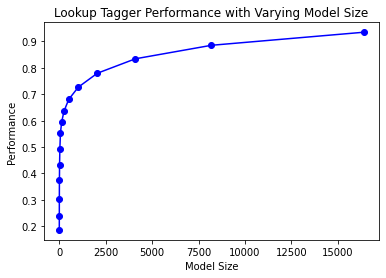

In [198]:
display()   

#### Observe that performance initially increases rapidly as the model size grows, eventually reaching a plateau, when large increases in model size yield little improvement in performance. 

### 4.4   Evaluation

## 5   N-Gram Tagging

### 5.1   Unigram Tagging

#### Unigram taggers are based on a simple statistical algorithm: for each token, assign the tag that is most likely for that particular token. For example, it will assign the tag JJ to any occurrence of the word frequent, since frequent is used as an adjective (e.g. a frequent word) more often than it is used as a verb (e.g. I frequent this cafe). A unigram tagger behaves just like a lookup tagger (4), except there is a more convenient technique for setting it up, called training. In the following code sample, we train a unigram tagger, use it to tag a sentence, then evaluate:

#### We train a UnigramTagger by specifying tagged sentence data as a parameter when we initialize the tagger. The training process involves inspecting the tag of each word and storing the most likely tag for any word in a dictionary, stored inside the tagger.

In [199]:
import nltk

In [200]:
from nltk.corpus import brown

In [201]:
brown_tagged_sents = brown.tagged_sents(categories='news')

In [202]:
brown_sents = brown.sents(categories='news')

In [203]:
unigram_tagger = nltk.UnigramTagger(brown_tagged_sents)

In [204]:
unigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'QL'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [205]:
unigram_tagger.evaluate(brown_tagged_sents)

0.9349006503968017

### 5.2 Separating the Training and Testing Data

#### Now that we are training a tagger on some data, we must be careful not to test it on the same data, as we did in the above example. 
#### A tagger that simply memorized its training data and made no attempt to construct a general model would get a perfect score, but would also be useless for tagging new text. 
#### Instead, we should split the data, training on 90% and testing on the remaining 10%:

In [206]:
size = int(len(brown_tagged_sents) * 0.9)

In [207]:
size

4160

In [208]:
train_sents = brown_tagged_sents[:size]

In [209]:
test_sents = brown_tagged_sents[size:]

In [210]:
unigram_tagger = nltk.UnigramTagger(train_sents)

In [211]:
unigram_tagger.evaluate(test_sents)

0.8121200039868434

#### Although the score is worse, we now have a better picture of the usefulness of this tagger, i.e. its performance on previously unseen text.

### 5.3   General N-Gram Tagging (See Slides)

#### The NgramTagger class uses a tagged training corpus to determine which part-of-speech tag is most likely for each context. Here we see a special case of an n-gram tagger, namely a bigram tagger. First we train it, then use it to tag untagged sentences:

In [212]:
bigram_tagger = nltk.BigramTagger(train_sents)

In [213]:
bigram_tagger.tag(brown_sents[2007])

[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

In [214]:
unseen_sent = brown_sents[4203]

In [215]:
bigram_tagger.tag(unseen_sent)

[('The', 'AT'),
 ('population', 'NN'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('Congo', 'NP'),
 ('is', 'BEZ'),
 ('13.5', None),
 ('million', None),
 (',', None),
 ('divided', None),
 ('into', None),
 ('at', None),
 ('least', None),
 ('seven', None),
 ('major', None),
 ('``', None),
 ('culture', None),
 ('clusters', None),
 ("''", None),
 ('and', None),
 ('innumerable', None),
 ('tribes', None),
 ('speaking', None),
 ('400', None),
 ('separate', None),
 ('dialects', None),
 ('.', None)]

#### Notice that the bigram tagger manages to tag every word in a sentence it saw during training, but does badly on an unseen sentence. As soon as it encounters a new word (i.e., 13.5), it is unable to assign a tag. It cannot tag the following word (i.e., million) even if it was seen during training, simply because it never saw it during training with a None tag on the previous word. Consequently, the tagger fails to tag the rest of the sentence. Its overall accuracy score is very low:

In [216]:
bigram_tagger.evaluate(test_sents)

0.10206319146815508

#### As n gets larger, the specificity of the contexts increases, as does the chance that the data we wish to tag contains contexts that were not present in the training data. This is known as the sparse data problem, and is quite pervasive in NLP. As a consequence, there is a trade-off between the accuracy and the coverage of our results (and this is related to the precision/recall trade-off in information retrieval).

## 5.4 Combining Taggers

#### One way to address the trade-off between accuracy and coverage is to use the more accurate algorithms when we can, but to fall back on algorithms with wider coverage when necessary. For example, we could combine the results of a bigram tagger, a unigram tagger, and a default tagger, as follows:
#### Try tagging the token with the bigram tagger.
#### If the bigram tagger is unable to find a tag for the token, try the unigram tagger.
#### If the unigram tagger is also unable to find a tag, use a default tagger.

#### Most NLTK taggers permit a backoff-tagger to be specified. The backoff-tagger may itself have a backoff tagger:

In [217]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t2.evaluate(test_sents)

0.8452108043456593

In [ ]:
# Exercise 6 Extend the above example by defining a TrigramTagger called t3, which backs off to t2

In [218]:
t0 = nltk.DefaultTagger('NN')
t1 = nltk.UnigramTagger(train_sents, backoff=t0)
t2 = nltk.BigramTagger(train_sents, backoff=t1)
t3 = nltk.BigramTagger(train_sents, backoff=t2)
t3
.evaluate(test_sents)

0.8452108043456593

### 5.5   Tagging Unknown Words

#### Our approach to tagging unknown words still uses backoff to a regular-expression tagger or a default tagger. These are unable to make use of context. Thus, if our tagger encountered the word blog, not seen during training, it would assign it the same tag, regardless of whether this word appeared in the context the blog or to blog. How can we do better with these unknown words, or out-of-vocabulary items?
#### A useful method to tag unknown words based on context is to limit the vocabulary of a tagger to the most frequent n words, and to replace every other word with a special word UNK using the method shown in 3. During training, a unigram tagger will probably learn that UNK is usually a noun. However, the n-gram taggers will detect contexts in which it has some other tag. For example, if the preceding word is to (tagged TO), then UNK will probably be tagged as a verb.